## Module-1: Initial Data Exploration

### Patnaikuni V Siva Ugandhara Manoj Kumar

### 21BDS0252

#### Data Loading

In [1]:
import pandas as pd
import numpy as np
# Load the dataset
data_url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/1000%20Sales%20Records.csv"
data = pd.read_csv(data_url)

data.head()

data.info()

# Check for missing values
data.isnull().sum()

# Display summary statistics
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1000 non-null   object 
 1   Country         1000 non-null   object 
 2   Item Type       1000 non-null   object 
 3   Sales Channel   1000 non-null   object 
 4   Order Priority  1000 non-null   object 
 5   Order Date      1000 non-null   object 
 6   Order ID        1000 non-null   int64  
 7   Ship Date       1000 non-null   object 
 8   Units Sold      1000 non-null   int64  
 9   Unit Price      1000 non-null   float64
 10  Unit Cost       1000 non-null   float64
 11  Total Revenue   1000 non-null   float64
 12  Total Cost      1000 non-null   float64
 13  Total Profit    1000 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 109.5+ KB


,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+03,1000.000000,1000.00000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.496813e+08,5053.988000,262.10684,184.965110,1.327322e+06,9.361192e+05,3.912026e+05
std,2.571334e+08,2901.375317,216.02106,175.289311,1.486515e+06,1.162571e+06,3.836402e+05
min,1.029280e+08,13.000000,9.33000,6.920000,2.043250e+03,1.416750e+03,5.326100e+02
25%,3.280740e+08,2420.250000,81.73000,56.670000,2.811919e+05,1.649319e+05,9.837612e+04
50%,5.566097e+08,5184.000000,154.06000,97.440000,7.549392e+05,4.647261e+05,2.772260e+05
75%,7.696945e+08,7536.750000,421.89000,263.330000,1.733503e+06,1.141750e+06,5.484568e+05
max,9.955298e+08,9998.000000,668.27000,524.960000,6.617210e+06,5.204978e+06,1.726181e+06


#### Data Types and Conversion

In [2]:
# Check the data types of each column
data.dtypes

# Convert columns to appropriate data types if necessary
# Assuming 'Age' column exists and needs conversion
if 'Age' in data.columns:
    data['Age'] = data['Age'].astype(int)


#### Handling Duplicates

In [3]:
# Check for duplicates
print(data.duplicated().sum())

# Remove duplicates if any
data = data.drop_duplicates()

0


## Module-2 Data Cleaning

#### Handling Missing Values

In [4]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

# Remove non-numeric columns before applying mean imputation
numeric_data = data.drop(columns=non_numeric_columns)

# Fill missing values in numeric columns with the mean
numeric_data = numeric_data.fillna(numeric_data.mean())

# Update dataset with filled values
data.update(numeric_data)

# Fill missing values in non-numeric columns with mode
for column in non_numeric_columns:
    data[column] = data[column].fillna(data[column].mode()[0])

Non-numeric columns: Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Ship Date'],
      dtype='object')


#### Outlier Detection and Removal

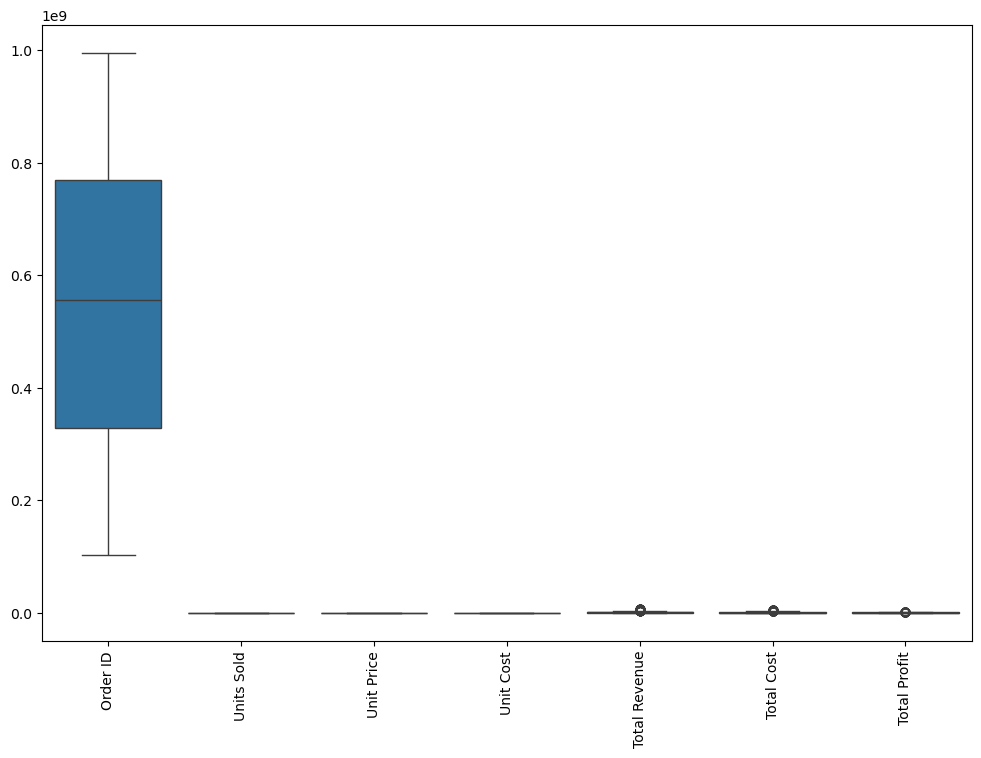

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for numeric features to detect outliers
plt.figure(figsize=(12, 8))
numeric_columns = data.select_dtypes(include=[np.number])
sns.boxplot(data=numeric_columns)
plt.xticks(rotation=90)
plt.show()

# Remove outliers using IQR method
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
outlier_mask = ~((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR)))
data_cleaned = numeric_columns[outlier_mask]

# Update the data
data.update(data_cleaned)

#### Data Normalization

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numeric columns
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(numeric_columns), columns=numeric_columns.columns)

# Display first few rows of normalized data
data_normalized.head()


,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,0.654124,0.844567,0.649331,0.494962,0.557892,0.427144,0.850679
1,0.093001,0.300951,0.219641,0.162169,0.069977,0.052466,0.110100
2,0.160536,0.150626,0.373251,0.294379,0.058232,0.046204,0.083961
3,0.065555,0.331397,0.298009,0.212706,0.102989,0.074492,0.170234
4,0.608094,0.984677,0.000000,0.000000,0.013576,0.012820,0.013441


#### Data Transformation

In [7]:
# Log transformation for skewed features (example: 'Glucose')
if 'Glucose' in data.columns:
    data['Log_Glucose'] = np.log1p(data['Glucose'])

## Module-3: Data Visualization

#### Univariate Analysis

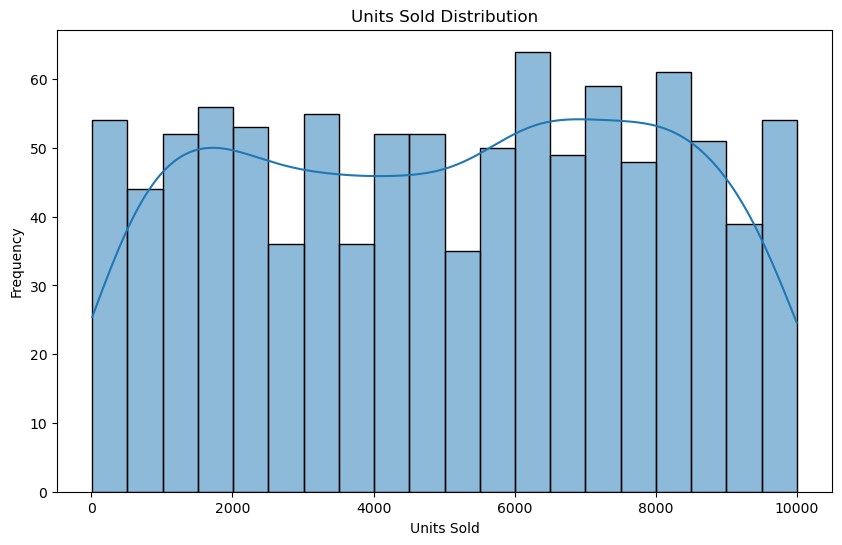

In [8]:
# Histogram for 'Units Sold'
plt.figure(figsize=(10, 6))
sns.histplot(data['Units Sold'], bins=20, kde=True)
plt.title('Units Sold Distribution')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()

#### Bivariate Analysis

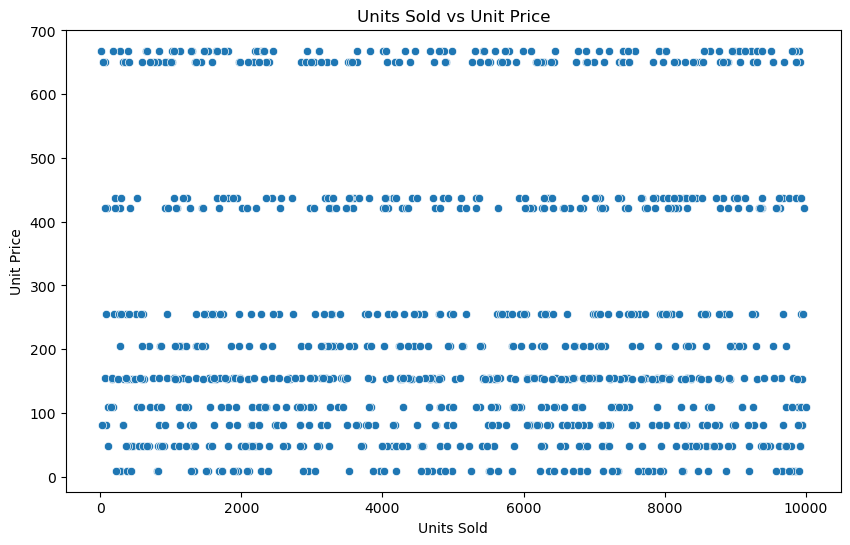

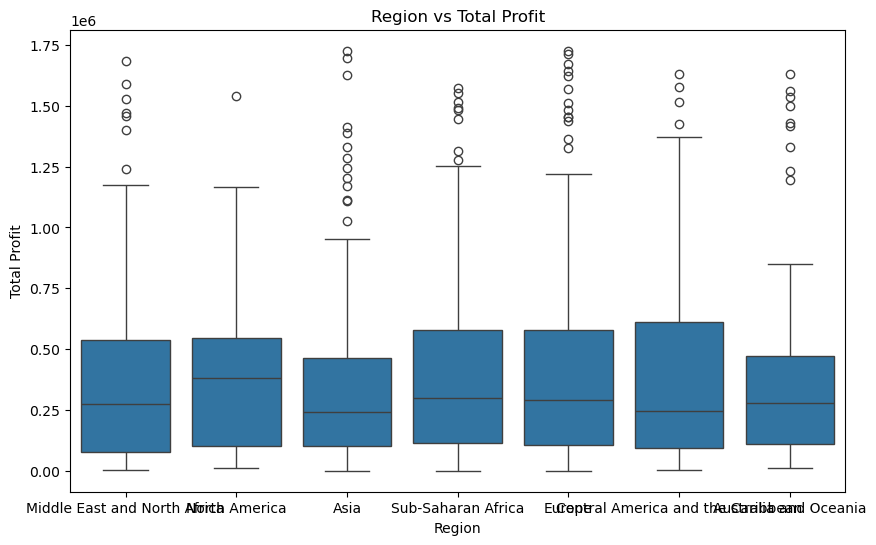

In [9]:
# Scatter plot for 'Units Sold' vs 'Unit Price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Units Sold', y='Unit Price', data=data)
plt.title('Units Sold vs Unit Price')
plt.xlabel('Units Sold')
plt.ylabel('Unit Price')
plt.show()

# Boxplot for 'Region' vs 'Total Profit'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Total Profit', data=data)
plt.title('Region vs Total Profit')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

#### Correlation Analysis

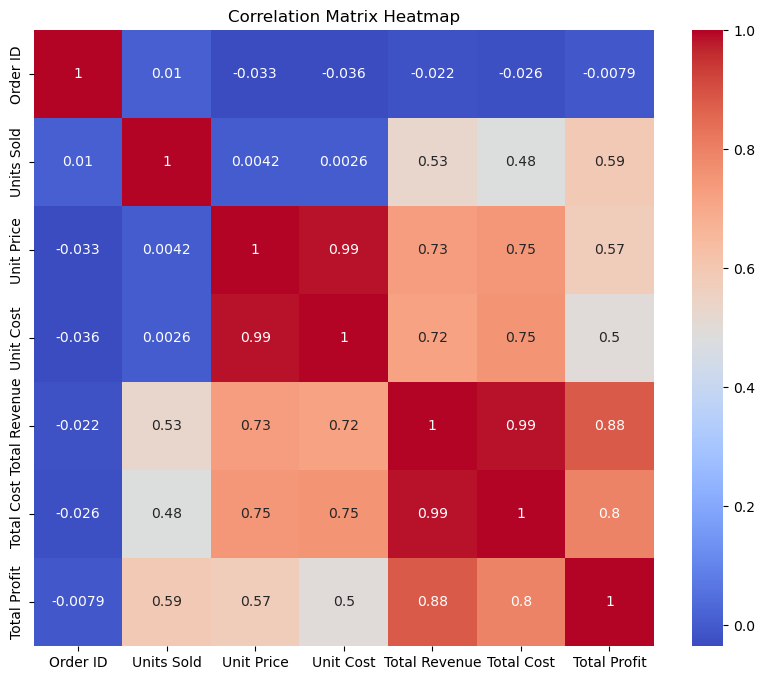

In [10]:
# Filter only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


#### Pair Plot Analysis

c:\Users\Manoj Kumar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Manoj Kumar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Manoj Kumar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Manoj Kumar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Manoj Kumar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Manoj Kumar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarnin

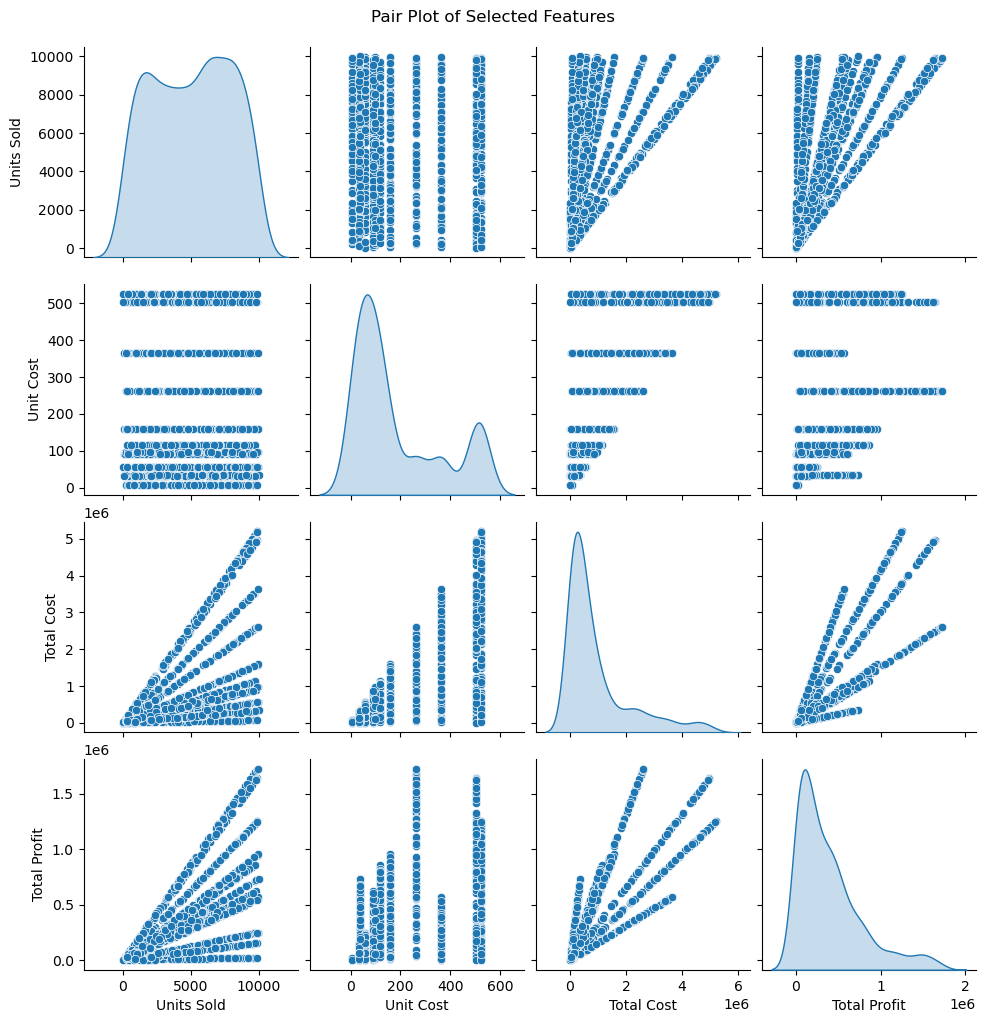

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data[['Units Sold', 'Unit Cost', 'Total Cost', 'Total Profit']], diag_kind='kde', palette='Set1')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

## Module 4: Statistical Analysis and Advanced Visualizations

#### Statistical Summary Measures

In [12]:
numeric_data = data.select_dtypes(include=[float, int])  # Select only numeric columns
data_summary = numeric_data.describe().T

# Calculate Variance and Skewness for numeric columns
data_summary['Variance'] = numeric_data.var()
data_summary['Skewness'] = numeric_data.skew()

data_summary

,count,mean,std,min,25%,50%,75%,max,Variance,Skewness
Order ID,1000.0,5.496813e+08,2.571334e+08,1.029280e+08,3.280740e+08,5.566097e+08,7.696945e+08,9.955298e+08,6.611756e+16,-0.021279
Units Sold,1000.0,5.053988e+03,2.901375e+03,1.300000e+01,2.420250e+03,5.184000e+03,7.536750e+03,9.998000e+03,8.417979e+06,-0.051217
Unit Price,1000.0,2.621068e+02,2.160211e+02,9.330000e+00,8.173000e+01,1.540600e+02,4.218900e+02,6.682700e+02,4.666510e+04,0.792035
Unit Cost,1000.0,1.849651e+02,1.752893e+02,6.920000e+00,5.667000e+01,9.744000e+01,2.633300e+02,5.249600e+02,3.072634e+04,0.948031
Total Revenue,1000.0,1.327322e+06,1.486515e+06,2.043250e+03,2.811919e+05,7.549392e+05,1.733503e+06,6.617210e+06,2.209726e+12,1.631538
Total Cost,1000.0,9.361192e+05,1.162571e+06,1.416750e+03,1.649319e+05,4.647261e+05,1.141750e+06,5.204978e+06,1.351571e+12,1.798451
Total Profit,1000.0,3.912026e+05,3.836402e+05,5.326100e+02,9.837612e+04,2.772260e+05,5.484568e+05,1.726181e+06,1.471798e+11,1.405377


#### Advanced Visualizations

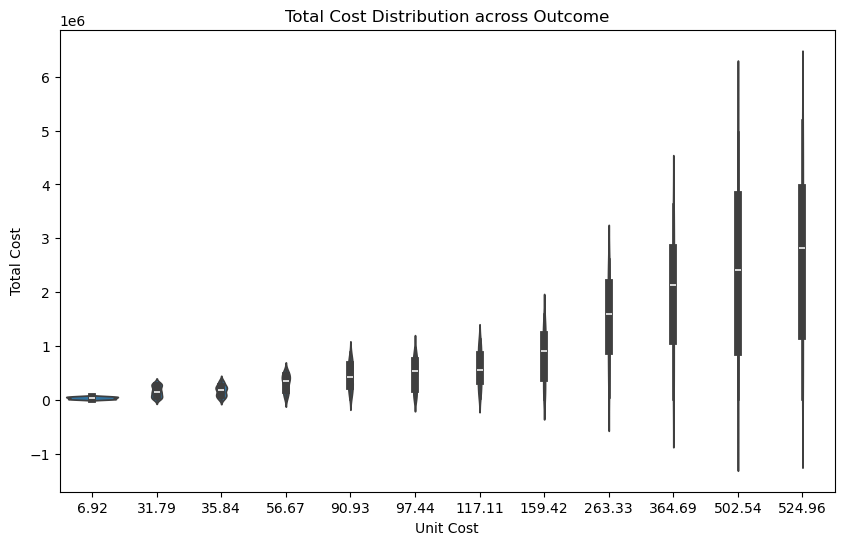

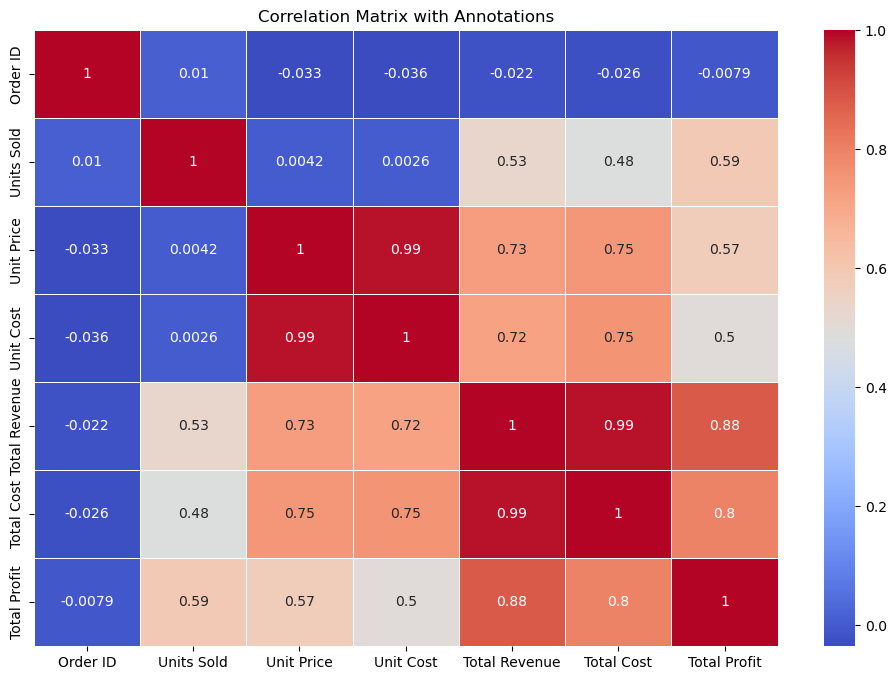

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Unit Cost', y='Total Cost', data=data)  # Adjust the y column based on available data
plt.title('Total Cost Distribution across Outcome')
plt.show()

# Heatmap for pairwise correlation using numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=[float, int]).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix with Annotations')
plt.show()

#### Contingency Tables

In [15]:
contingency_table = pd.crosstab(data['Units Sold'], data['Total Profit'])
print("Contingency Table for Units Sold and Total Profit:")
print(contingency_table)

# Heatmap for contingency table
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap='Blues', annot=True)
plt.title('Contingency Table Heatmap for Units Sold and Total Profit')
plt.show()

# Relative frequency table
relative_frequency = contingency_table / contingency_table.sum().sum()
print("Relative Frequency Dataset:")
print(relative_frequency)

# Chi-square statistic
# Calculate using the correct formula
observed_values = contingency_table.values
chi2_stat = ((observed_values - observed_values.mean())**2 / observed_values.mean()).sum()
print("Chi-square Statistic:", chi2_stat)

Contingency Table for Units Sold and Total Profit:
Total Profit  532.61      626.50      660.34      706.13      927.85      \
Units Sold                                                                 
13                     0           0           0           0           0   
25                     0           1           0           0           0   
33                     0           0           0           0           0   
61                     0           0           0           0           0   
64                     0           0           0           0           0   
...                  ...         ...         ...         ...         ...   
9950                   0           0           0           0           0   
9951                   0           0           0           0           0   
9958                   0           0           0           0           0   
9980                   0           0           0           0           0   
9998                   0           0 

## Module-5 Clustering Analysis

#### Clustering Analysis

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from scipy.spatial import distance_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data_numeric = data.select_dtypes(include=[np.number])
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(data_scaled)

c:\Users\Manoj Kumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [21]:
cluster_means = data.groupby('kmeans_cluster')[data_numeric.columns].mean()
print(cluster_means)

                    Order ID   Units Sold  Unit Price   Unit Cost  \
kmeans_cluster                                                      
0               7.622243e+08  5011.899522  162.880909  104.066053   
1               5.351133e+08  6962.521739  560.119227  427.231401   
2               3.208083e+08  4047.392000  208.207840  141.409600   

                Total Revenue    Total Cost   Total Profit  kmeans_cluster  
kmeans_cluster                                                              
0                6.937680e+05  4.241333e+05  269634.727560             0.0  
1                3.810544e+06  2.894946e+06  915598.357633             1.0  
2                6.627845e+05  4.255406e+05  237243.827760             2.0  


#### Visualizing Clusters

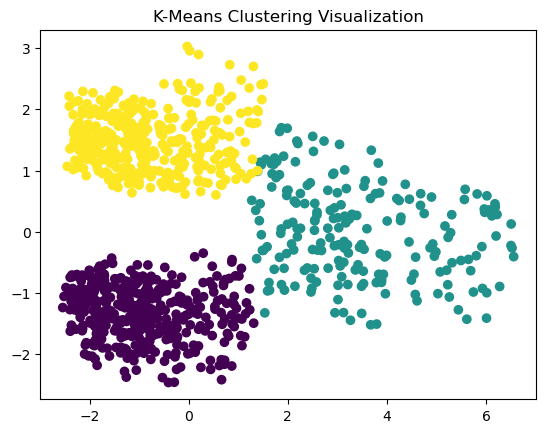

In [22]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['kmeans_cluster'], cmap='viridis')
plt.title("K-Means Clustering Visualization")
plt.show()

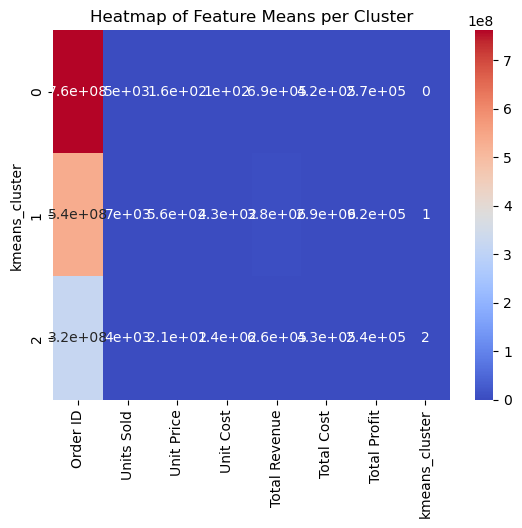

In [23]:
sns.heatmap(cluster_means, annot=True, cmap='coolwarm')
plt.title("Heatmap of Feature Means per Cluster")
plt.show()

#### Spectral Clustering

In [24]:
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
data['spectral_cluster'] = spectral.fit_predict(data_scaled)

c:\Users\Manoj Kumar\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\Manoj Kumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


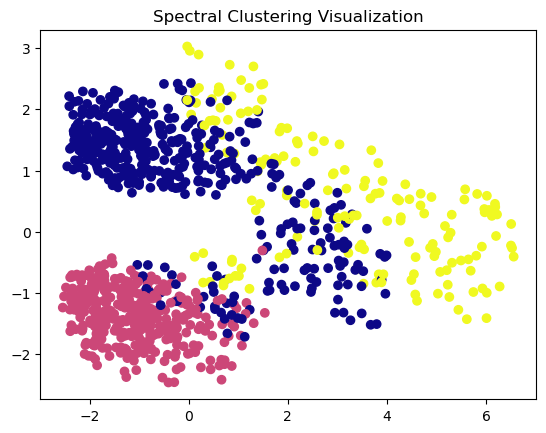

In [25]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['spectral_cluster'], cmap='plasma')
plt.title("Spectral Clustering Visualization")
plt.show()

#### Minimum Spanning Tree (MST) Clustering

In [26]:
dist_matrix = distance_matrix(data_scaled, data_scaled)
mst = minimum_spanning_tree(dist_matrix)

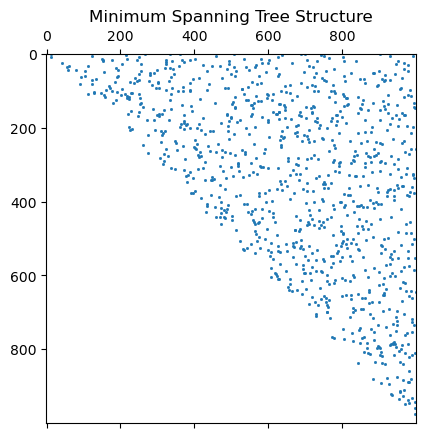

In [27]:
plt.spy(mst, markersize=1)
plt.title("Minimum Spanning Tree Structure")
plt.show()

#### Model-Based Clustering using Expectation-Maximization (EM)

In [28]:
gmm = GaussianMixture(n_components=3, random_state=42)
data['gmm_cluster'] = gmm.fit_predict(data_scaled)

c:\Users\Manoj Kumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


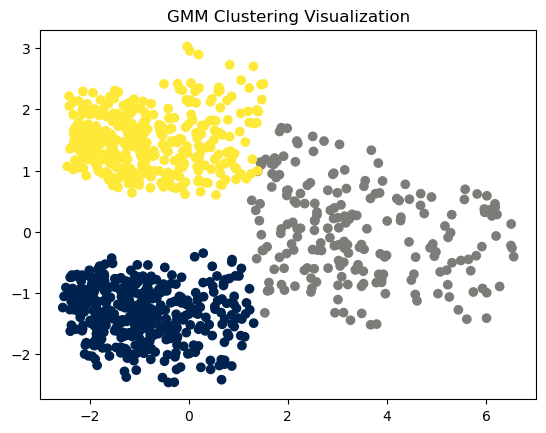

In [29]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['gmm_cluster'], cmap='cividis')
plt.title("GMM Clustering Visualization")
plt.show()

#### Hierarchical Agglomerative Clustering

In [30]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
data['agg_cluster'] = agg_clustering.fit_predict(data_scaled)

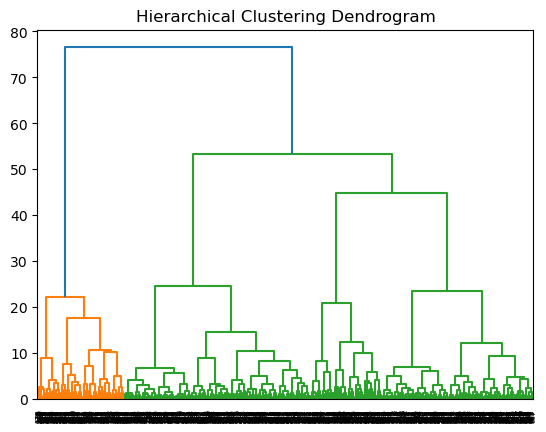

In [31]:
dendro = linkage(data_scaled, method='ward')
dendrogram(dendro)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

#### Outlier Detection using Clustering

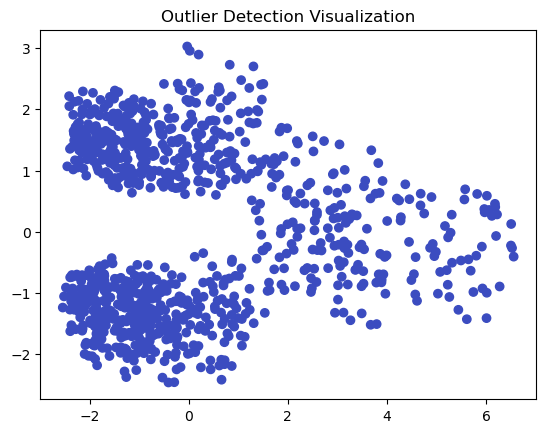

In [32]:
outliers = data[data['kmeans_cluster'] == -1]  # assuming -1 as outlier label for clustering algorithms
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=(data['kmeans_cluster'] == -1), cmap='coolwarm')
plt.title("Outlier Detection Visualization")
plt.show()

## Module 6: Dimensionality Reduction

#### Principal Component Analysis (PCA)

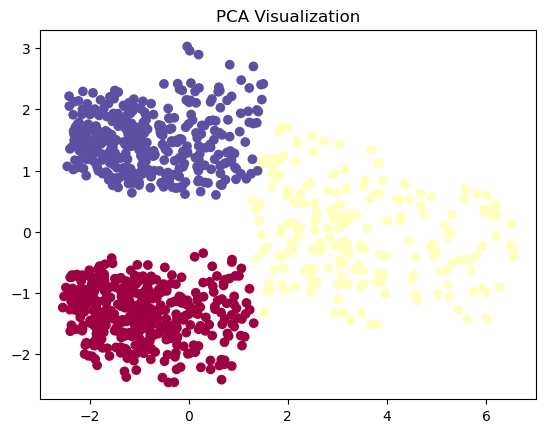

In [33]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['kmeans_cluster'], cmap='Spectral')
plt.title("PCA Visualization")
plt.show()

#### Singular Value Decomposition (SVD)

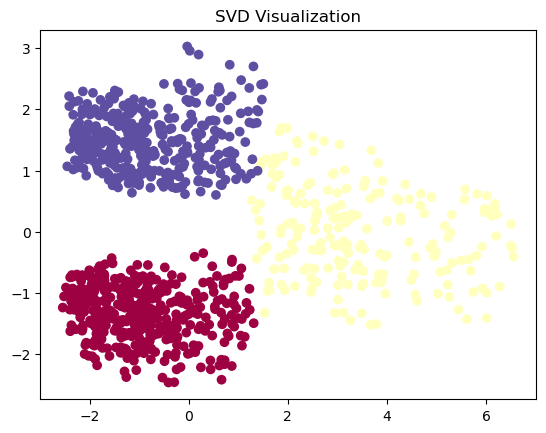

In [34]:
svd = TruncatedSVD(n_components=2)
data_svd = svd.fit_transform(data_scaled)
plt.scatter(data_svd[:, 0], data_svd[:, 1], c=data['kmeans_cluster'], cmap='Spectral')
plt.title("SVD Visualization")
plt.show()

#### Factor Analysis (FA)

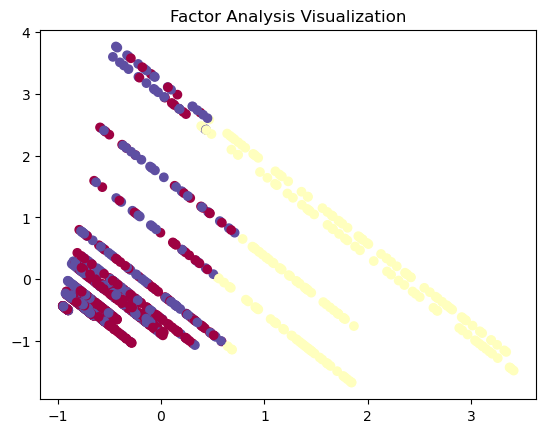

In [35]:
fa = FactorAnalysis(n_components=2)
data_fa = fa.fit_transform(data_scaled)
plt.scatter(data_fa[:, 0], data_fa[:, 1], c=data['kmeans_cluster'], cmap='Spectral')
plt.title("Factor Analysis Visualization")
plt.show()

#### Multidimensional Scaling (MDS)

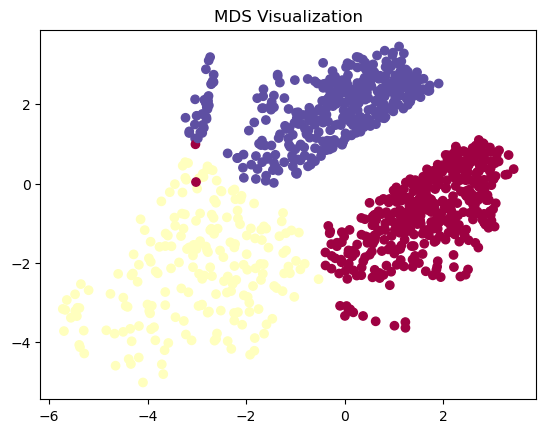

In [36]:
mds = MDS(n_components=2)
data_mds = mds.fit_transform(data_scaled)
plt.scatter(data_mds[:, 0], data_mds[:, 1], c=data['kmeans_cluster'], cmap='Spectral')
plt.title("MDS Visualization")
plt.show()

#### t-SNE

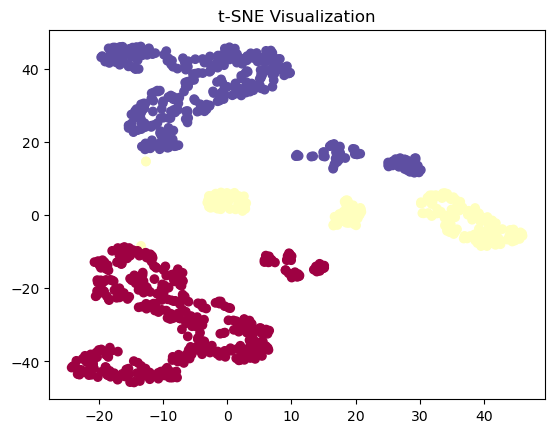

In [37]:
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=data['kmeans_cluster'], cmap='Spectral')
plt.title("t-SNE Visualization")
plt.show()

## Module 7: Model Development and Evaluation

#### Constructing a Linear Regression Model

In [40]:
target = 'Total Profit'
features = data_scaled

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, data[target], test_size=0.3, random_state=42)

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.511664708071137e-20


In [47]:
threshold = 50000
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (y_pred > threshold).astype(int)
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print("Binary Accuracy (High/Low Profit):", accuracy)

Binary Accuracy (High/Low Profit): 1.0
